# HW5 word2vec

In [1]:
# load pymagnitude and other lib
from pymagnitude import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load trained magnitude
file_path = "GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

## Q1: What is the dimensionality of these word embeddings?

In [3]:
vectors.dim

300

## Q2: What are the top-5 most similar words topicnic(not includingpicnicitself)?

In [4]:
vectors.most_similar("picnic", topn=5+1)


[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216)]

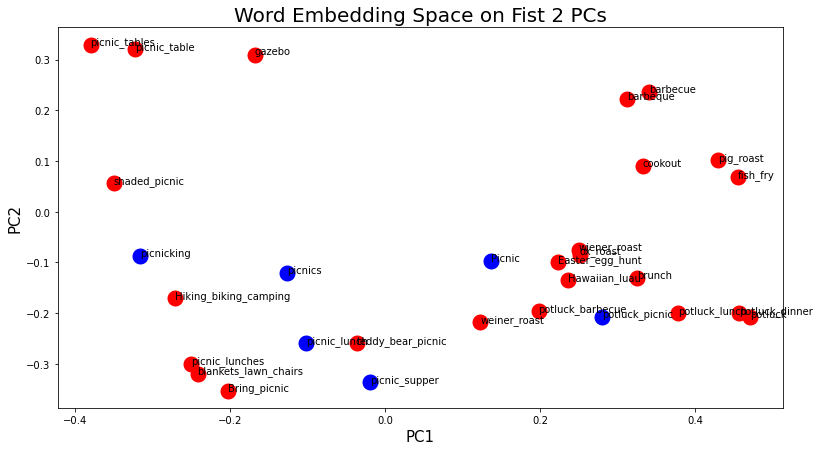

In [5]:
w_list = list(list(zip(*(vectors.most_similar("picnic", topn=30))))[0])
X = vectors.query(w_list) 
w_df = pd.DataFrame(X)
w_df.index = w_list
w_corr=w_df.corr()
e_values,e_vectors=np.linalg.eig(w_corr)
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-e_values).argsort()
e_values = e_vectors[args]
e_vectors = e_vectors[:, args]
#Taking first 2 components which explain maximum variance for projecting
new_e_vectors=e_vectors[:,:2]
#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_e_vectors)

plt.figure(figsize=(13,7))
plt.scatter(neww_X[:6,0],neww_X[:6,1],linewidths=10,color='blue')
plt.scatter(neww_X[6:,0],neww_X[6:,1],linewidths=10,color='red')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space on Fist 2 PCs",size=20)
vocab=list(w_list)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))


Blue colored words are top 5 most similar words to `picnic`. However, 2-dims are not enough to show the true locations.

## Q3: According to the word embeddings, which of these words is not like the others? `['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']`

In [6]:
w_list = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'] 
vectors.doesnt_match(w_list)

'tissue'

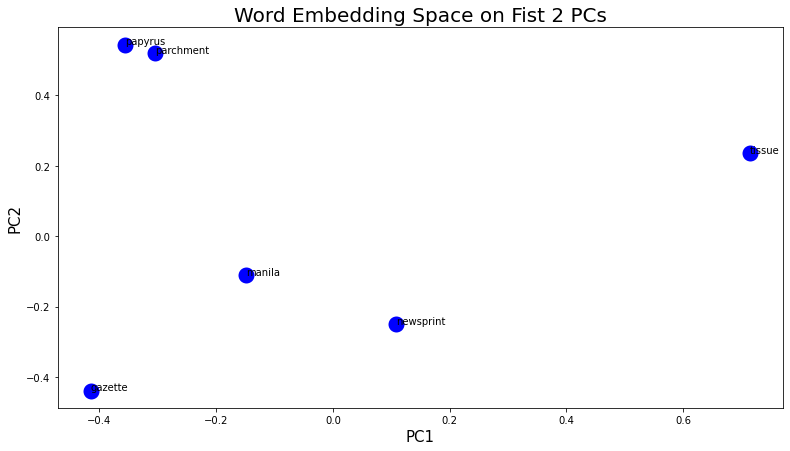

In [7]:
X = vectors.query(w_list) 
w_df = pd.DataFrame(X)
w_df.index = w_list
w_corr=w_df.corr()
e_values,e_vectors=np.linalg.eig(w_corr)
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-e_values).argsort()
e_values = e_vectors[args]
e_vectors = e_vectors[:, args]
#Taking first 2 components which explain maximum variance for projecting
new_e_vectors=e_vectors[:,:2]
#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_e_vectors)

plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space on Fist 2 PCs",size=20)
vocab=list(w_list)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

## Q4: Solve the following analogy: `leg` is to `jump` as `X` is to `throw`.

In [8]:
X = vectors.most_similar(positive = ["throw", "leg"], negative = ["jump"])
X

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

In [9]:
w_list = ["throw", "leg","jump"]
w_list.extend(list(list(zip(*X))[0]))
print(w_list)

['throw', 'leg', 'jump', 'forearm', 'shin', 'elbow', 'metacarpal_bone', 'metacarpal_bones', 'ankle', 'shoulder', 'thigh', 'knee', 'ulna_bone']


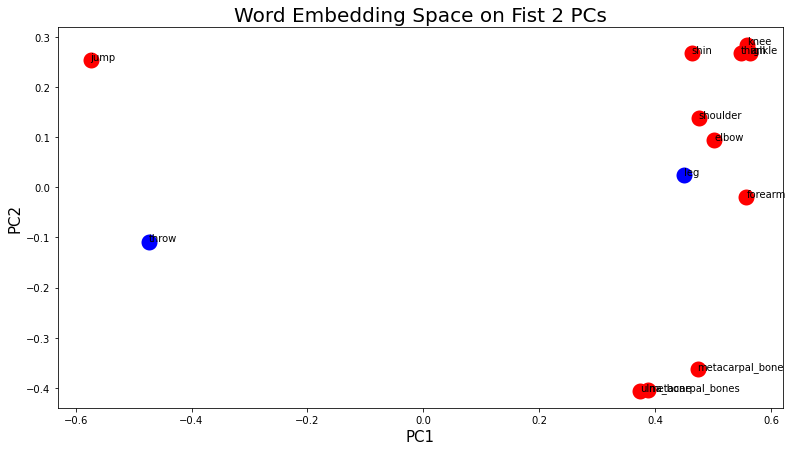

In [10]:
X = vectors.query(w_list) 
w_df = pd.DataFrame(X)
w_df.index = w_list
w_corr=w_df.corr()
e_values,e_vectors=np.linalg.eig(w_corr)
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-e_values).argsort()
e_values = e_vectors[args]
e_vectors = e_vectors[:, args]
#Taking first 2 components which explain maximum variance for projecting
new_e_vectors=e_vectors[:,:2]
#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_e_vectors)

plt.figure(figsize=(13,7))
plt.scatter(neww_X[:2,0],neww_X[:2,1],linewidths=10,color='blue')
plt.scatter(neww_X[2:,0],neww_X[2:,1],linewidths=10,color='red')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space on Fist 2 PCs",size=20)
vocab=list(w_list)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))